## Linear regression with one variable

### Assignment 2.1: Plotting the data

Dimentions of training samples: [97 , 2]
Size of training samples: 97


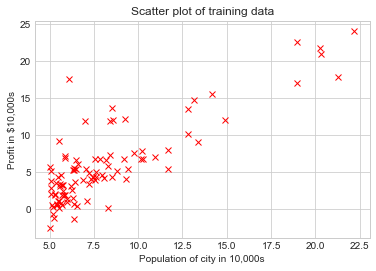

In [95]:
import matplotlib.pyplot as plt
import numpy as np

train_data = np.genfromtxt('ex1data1.txt', delimiter=',')
print("Dimentions of training samples: [%d" % train_data.shape[0], ", %d]" % train_data.shape[1])

X = train_data[:, 0]
y = train_data[:, 1]
m = y.shape[0]
print("Size of training samples: %d" % m)

X = X.reshape(m, 1)
y = y.reshape(m, 1)

# Scatter plot
plt.style.use('seaborn-whitegrid')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plot of training data")
plt.plot(X, y, 'rx');

### Assignment 2.2: Gradient Descent

In [96]:
### Method to compute Cost Function
def compute_cost(X, y, theta):
    diff = X.dot(theta) - y
    ssq = np.sum(diff**2)
    return ssq / (2 * m)

In [97]:
# Add one additional column of all ones to X representing x0
x0 = np.ones((m, 1))
original_X = X
X = np.append(x0, X, axis=1)
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


In [98]:
# Initialize thetas to zeros
# Iteration count to 1500
# Alpha to 0.01
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

# Tests on compute_cost
J = compute_cost(X, y, theta)
print("Expected cost value 32.07; Calculated cost value %f" % J)

theta_temp = np.array([[-1], [2]])
J = compute_cost(X, y, theta_temp)
print("Expected cost value 54.24; Calculated cost value %f" % J)

Expected cost value 32.07; Calculated cost value 32.072734
Expected cost value 54.24; Calculated cost value 54.242455


In [115]:
# Method to calculate gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for step in range(num_iters):
        if step >= 1:
            theta_0 = theta[0, 0] - alpha * np.sum(X.dot(theta) - y) / m
            theta_1 = theta[1, 0] - alpha * np.sum((X.dot(theta) - y) * X) / m
            theta[0, 0] = theta_0
            theta[1, 0] = theta_1
        J_curr = compute_cost(X, y, theta)
        J_history[step - 1] = J_curr
        print("Current Cost Value %f" % J_curr)
    return theta
        
# Calculate theta
theta = gradient_descent(X, y, theta, alpha, iterations)
print("\nObtained theta values: ")
print(theta)

ValueError: shapes (97,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

(97, 2)


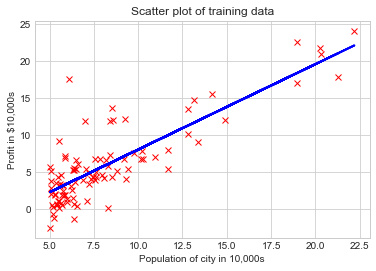

In [100]:
print(X.shape)
### Plot the resultant linear regression 
plt.style.use('seaborn-whitegrid')
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Scatter plot of training data")
plt.plot(original_X, y, 'rx', X[:, 1], X.dot(theta), 'b-', lw=2)

In [101]:
### Predictions
test1 = np.array([1, 3.5]).reshape(1, 2)
test2 = np.array([1, 7]).reshape(1, 2)
predict1 = test1.dot(theta)
print('For population = 35,000, we predict a profit of %f\n' % (predict1 * 10000))
predict2 = test2.dot(theta)
print('For population = 70,000, we predict a profit of %f\n' % (predict2 * 10000))

For population = 35,000, we predict a profit of 4973.103521

For population = 70,000, we predict a profit of 45513.377992



### Assignment 2.4: Visualizing J(θ)

## Linear regression with multiple variables

### Assignment 3.1: Feature Normalization

In [102]:
import matplotlib.pyplot as plt
import numpy as np

data_multi = np.genfromtxt('ex1data2.txt', delimiter=',')
print("Dimentions of training samples: [%d" % data_multi.shape[0], ", %d]" % data_multi.shape[1])

Dimentions of training samples: [47 , 3]


In [104]:
X_multi = data_multi[:, 0:2]
print(X_multi.shape)
y = data_multi[:, 2]
multi = y.shape[0]
print("Size of training samples: %d" % multi)

y = y.reshape(multi, 1)

print('First 10 examples from the dataset: \n')
print(X_multi[0:10,:])
print(y[0:10,:])

def featureNormalize(X):
    X_norm = X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    # Tile rows together for matrix operations
    mu_matrix = np.tile(mu, (X.shape[0], 1))
    sigma_matrix = np.tile(sigma, (X.shape[0], 1))
    X_norm = (X_norm - mu_matrix) / sigma_matrix
    mu = mu.reshape(1, X.shape[1])
    sigma = sigma.reshape(1, X.shape[1])
    return X_norm, mu, sigma

(47, 2)
Size of training samples: 47
First 10 examples from the dataset: 

[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]
 [  1.98500000e+03   4.00000000e+00]
 [  1.53400000e+03   3.00000000e+00]
 [  1.42700000e+03   3.00000000e+00]
 [  1.38000000e+03   3.00000000e+00]
 [  1.49400000e+03   3.00000000e+00]]
[[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]
 [ 299900.]
 [ 314900.]
 [ 198999.]
 [ 212000.]
 [ 242500.]]


In [92]:
X_norm, mu, sigma = featureNormalize(X_multi)
print(mu)
print(sigma)

[[ 2000.68085106     3.17021277]]
[[  7.86202619e+02   7.52842809e-01]]


### Assignment 3.2: Gradient Descent

In [93]:
### Add x0 column into training dataset
x0 = np.ones((multi, 1))
original_X_multi = X_norm
X_norm = np.append(x0, X_norm, axis=1)

In [114]:
### Method to calculate cost value for multi-variant
def compute_cost_multi(X, y, theta):
    T = X.dot(theta) - y
    return np.transpose(T).dot(T) / (2 * multi)
    
### Method to calculate gradient descent for multi-variant
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for step in range(num_iters):
        delta = (1 / multi) * np.sum(X * np.tile((X.dot(theta) - y), (1, X.shape[1])))
        theta = np.transpose(np.transpose(theta) - alpha * delta)
        J_curr = compute_cost_multi(X, y, theta)
        J_history[step - 1] = J_curr
        print("Current Cost Value %f" % J_curr)
    return theta

theta = np.zeros((X_norm.shape[1], 1))
iterations = 1500
alpha = 0.01

theta = gradient_descent_multi(X_norm, y, theta, alpha, iterations)
print(theta)

Current Cost Value 63134365890.513382
Current Cost Value 60875481479.188629
Current Cost Value 58798891981.422997
Current Cost Value 56889885960.304115
Current Cost Value 55134939211.035980
Current Cost Value 53521618949.761116
Current Cost Value 52038495734.469574
Current Cost Value 50675062494.005264
Current Cost Value 49421660091.536919
Current Cost Value 48269408895.153847
Current Cost Value 47210145870.803833
Current Cost Value 46236366751.912704
Current Cost Value 45341172875.991058
Current Cost Value 44518222311.595955
Current Cost Value 43761684929.410492
Current Cost Value 43066201099.145744
Current Cost Value 42426843719.656563
Current Cost Value 41839083313.276329
Current Cost Value 41298755937.084534
Current Cost Value 40802033683.776711
Current Cost Value 40345397563.152634
Current Cost Value 39925612572.103775
Current Cost Value 39539704776.485100
Current Cost Value 39184940242.509834
Current Cost Value 38858805668.407959
Current Cost Value 38558990579.135178
Current Cost